<a href="https://colab.research.google.com/github/Travoltah/Zimbabwe-MNOs-Sentiment-Analysis/blob/main/Ecocash_Sentiment_Analysis_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecocash Customer Service Sentiment Analysis



## Main Research Objective

To develop a machine learning model for customer sentiment analysis and market share trend prediction using twitter data for Ecocash Mobile Money Operator in Zimbabwe.


### Specific Research objectives

1.	To construct a time series analysis of how the frequencies of customer complaints have changed over the last 5 years.
2.	To present monthly distribution of customer complaints.
3.	To evaluate the impact of social media sentiments to the actual business market share.
4.	To forecast future market share changes in relation to customer complaint changes.


As stated before, the primary data will be scraped from twitter. Other supporting data will be sourced from different documents such as Potraz annual/quarterly reports.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data1 = pd.read_csv('/content/drive/My Drive/ecocashdata2.csv', sep="\t")
data2 = pd.read_csv('/content/drive/My Drive/ecocash_twitter_JAN2017_to_JUN2021.csv', index_col=0)

data=pd.concat([data1,data2])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory Data Analysis

The data is now structured but we still need further insights of what it compromises of. This is also where we clean our data to make it ready for analysis.

Let's begin by taking a look at a snapshot of our data.

In [ ]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1454558148522565641,1454557178174611458,2021-10-30 23:17:41 South Africa Standard Time,2021-10-30,23:17:41,200,2900688735,bustoptv,#HealthPeopleHealthNation,NaN,@drDendere Thank you Dr mune Ecocash here 😁,en,[],[],[],2,0,1,[],[],https://twitter.com/bustoptv/status/1454558148...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'drDendere', 'name': 'Chipo D...",NaN,NaN,NaN,NaN
1,1454549529668292608,1454549529668292608,2021-10-30 22:43:26 South Africa Standard Time,2021-10-30,22:43:26,200,3334888083,drdendere,Chipo Dendere,NaN,Guys if you’re enjoying #wadiwawepamoyo you ca...,en,[],[],['https://pbs.twimg.com/media/FC-ZEgjXIAURU3o....,1,12,31,['wadiwawepamoyo'],[],https://twitter.com/drDendere/status/145454952...,False,NaN,1,https://pbs.twimg.com/media/FC-ZEgjXIAURU3o.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1454519309947084802,1454355609105670144,2021-10-30 20:43:21 South Africa Standard Time,2021-10-30,20:43:21,200,358977716,niggamumu,Nigga,NaN,@_NobleSavage Car park in town ndinenge ndisin...,en,[],[],[],0,0,1,[],[],https://twitter.com/NiggaMumu/status/145451930...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_NobleSavage', 'name': 'ɴᴏʙʟ...",NaN,NaN,NaN,NaN
3,1454509738343944195,1454443372962361351,2021-10-30 20:05:19 South Africa Standard Time,2021-10-30,20:05:19,200,1654770775,ecocashzw,EcoCash Zimbabwe,NaN,@TAWANDAMACHING4 @Ecocash40541216 Issue is bei...,en,[],[],[],0,0,0,[],[],https://twitter.com/EcoCashZW/status/145450973...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'TAWANDAMACHING4', 'name': 'R...",NaN,NaN,NaN,NaN
4,1454498022457491463,1454493262551650312,2021-10-30 19:18:46 South Africa Standard Time,2021-10-30,19:18:46,200,1654770775,ecocashzw,EcoCash Zimbabwe,NaN,@FaithSharleen Good day. Thanks for reaching o...,en,[],[],[],0,0,0,[],[],https://twitter.com/EcoCashZW/status/145449802...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'FaithSharleen', 'name': 'Fai...",NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
407919,682806052795105280,682674914080473088,1451628623000,2017-01-01,08:10:23,South Africa Standard Time,1602751363,econet_support,Econet Customer Care,NaN,"Airtime transfer is free @NashMcRonzie , pleas...",NaN,['nashmcronzie'],[],[],1,0,1,[],[],https://twitter.com/econet_support/status/6828...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1602751363', 'username': 'econet...",NaN,NaN,NaN,NaN
407920,682797771036954624,682797771036954624,1451626649000,2017-01-01,07:37:29,South Africa Standard Time,820894273,chinakaclive,Stay at home,NaN,@econet_support mandibira ka apa,NaN,['econet_support'],[],[],0,0,0,[],[],https://twitter.com/ChinakaClive/status/682797...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '820894273', 'username': 'Chinaka...",NaN,NaN,NaN,NaN
407921,682797739906838528,682645314956832771,1451626641000,2017-01-01,07:37:21,South Africa Standard Time,1602751363,econet_support,Econet Customer Care,NaN,"Compliments of the new season @DivineGunner , ...",NaN,['divinegunner'],[],[],0,0,0,[],[],https://twitter.com/econet_support/status/6827...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1602751363', 'username': 'econet...",NaN,NaN,NaN,NaN
407922,682797512219070464,682797512219070464,1451626587000,2017-01-01,07:36:27,South Africa Standard Time,221668086,dorkatcooltable,Walking Stick Man,NaN,@econet_support if i ecocash the wrong number ...,NaN,['econet_support'],[],[],1,0,0,[],[],https://twitter.com/DorkAtCoolTable/status/682...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '221668086', 'username': 'DorkAtC...",NaN,NaN,NaN,NaN
407923,682797487116140544,682797487116140544,1451626581000,2017-01-01,07:36:21,South Africa Standard Time,820894273,chinakaclive,Stay at home,NaN,@econet_support hd 66c & I was tryin to cal sm...,NaN,['econet_support'],[],[],1,0,0,[],[],https://twitter.com/ChinakaClive/status/682797...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '820894273', 'username': 'Chinaka...",NaN,NaN,NaN,NaN


We can see that the columns we require are all there.

Next, let's explore the size and/or shape of our dataframe.

In [ ]:
print('{} rows, {} columns'.format(data.shape[0], data.shape[1]))

409453 rows, 36 columns


In [ ]:
data.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone            object
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [ ]:
data.describe(include='all')

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
count,4.094530e+05,4.094530e+05,4.094530e+05,409453,409453,409453,4.094530e+05,409453,409439,8,409453,1529,409453,409453,409453,409453.000000,409453.000000,409453.000000,409453,409453,409453,409453,3690,409453.000000,207,0.0,0.0,0.0,0.0,0.0,0.0,409453,0.0,0.0,0.0,0.0
unique,NaN,NaN,3.705930e+05,1657,68691,2,NaN,36262,34354,8,342170,23,80269,5564,10627,NaN,NaN,NaN,2786,19,372164,1,3047,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN,153006,NaN,NaN,NaN,NaN
top,NaN,NaN,1.509389e+12,2021-05-05,11:32:37,South Africa Standard Time,NaN,econet_support,Econet Customer Care,Broadmeadows Railway Station,@econet_support,en,['econet_support'],[],[],NaN,NaN,NaN,[],[],https://twitter.com/doc_hillyzw/status/1001928...,False,https://twitter.com/econetzimbabwe/status/1244...,NaN,https://pbs.twimg.com/media/FC2vB69WYAEczDh.jpg,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1602751363', 'username': 'econet...",NaN,NaN,NaN,NaN
freq,NaN,NaN,8.000000e+00,2314,28,407924,NaN,141153,141153,1,1279,1146,124605,397508,397573,NaN,NaN,NaN,403535,409405,8,409453,10,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,16595,NaN,NaN,NaN,NaN
mean,1.098245e+18,1.097089e+18,NaN,NaN,NaN,NaN,2.419641e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697052,0.083863,0.383458,NaN,NaN,NaN,NaN,NaN,0.002743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.468933e+17,1.471067e+17,NaN,NaN,NaN,NaN,4.229796e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.722642,2.261421,4.254655,NaN,NaN,NaN,NaN,NaN,0.052299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.827975e+17,3.770077e+17,NaN,NaN,NaN,NaN,2.958951e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.043721e+18,1.042756e+18,NaN,NaN,NaN,NaN,1.602751e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.121117e+18,1.120569e+18,NaN,NaN,NaN,NaN,1.602751e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.203342e+18,1.202188e+18,NaN,NaN,NaN,NaN,7.033058e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our data set has 409453 rows and 39 columns. After running some descriptive statistics on this data, we can see that no column contains null values as each column has a count of 409453.

There are features on our data that aren't all that useful to our objective in this project, so it won't hurt to drop them. These include 'tweet_id', 'user_id' and 'time_zone'.

In [ ]:
data=data[['date','likes_count','replies_count','retweets_count','tweet','username','mentions']]

In [ ]:
data.head(3)

,date,likes_count,replies_count,retweets_count,tweet,username,mentions
0,2021-10-30,1,2,0,@drDendere Thank you Dr mune Ecocash here 😁,bustoptv,[]
1,2021-10-30,31,1,12,Guys if you’re enjoying #wadiwawepamoyo you ca...,drdendere,[]
2,2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,[]


In [ ]:
data.describe(include='all')

,date,likes_count,replies_count,retweets_count,tweet,username,mentions
count,409453,409453.000000,409453.000000,409453.000000,409453,409453,409453
unique,1657,NaN,NaN,NaN,342170,36262,80269
top,2021-05-05,NaN,NaN,NaN,@econet_support,econet_support,['econet_support']
freq,2314,NaN,NaN,NaN,1279,141153,124605
mean,NaN,0.383458,0.697052,0.083863,NaN,NaN,NaN
std,NaN,4.254655,1.722642,2.261421,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN
75%,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN


### Further Cleaning

The goal of our project is to come up with an aggregation of customer complaint count. Therefore, if our twitter search returned tweets by accounts belonging to Ecocash, Cassava Smartech, Econet, OneMoney, NetOne, Telecel or StewardBank, we need to exclude them.

In [ ]:
exclude_rows = data[(data['username']=='econet_support') | (data['username']=='econetzimbabwe') | (data['username']=='EcoCashZW') | (data['username']=='stewardbank')| (data['username']=='OneMoneyZw') | (data['username']=='NetOneCellular') | (data['username']=='Netonesupport') | (data['username']=='Telecel_Zim')| (data['username']=='cassavasmartech')]
print(exclude_rows.shape[0])
exclude_rows.head(3)

145290


,date,likes_count,replies_count,retweets_count,tweet,username,mentions
5,2021-10-30,0,2,0,"Hi @Dlodlo_princess, its a true story. Send a ...",econet_support,"[{'screen_name': 'dlodlo_princess', 'name': 'c..."
24,2021-10-30,0,2,0,"Hi @vallshng, please share the buying number, ...",econet_support,"[{'screen_name': 'vallshng', 'name': 'vall', '..."
33,2021-10-30,1,0,1,Swipe into EcoCash using your bank card on any...,stewardbank,[]


The data shows that these results do exist and it has 145290 rows. Upon scrutiny of the text column, we can see that it has nothing to do with enquiries which originated from a customer. Let's proceed to delete them.

In [ ]:
exclude_list = list(exclude_rows.index.values)
data.drop(exclude_list, inplace=True)

In [ ]:
data.shape[0]

263923

In [ ]:
# filtering the rows
include_rows = data[(data['tweet'].str.contains('ecocash')|data['tweet'].str.contains('EcoCash')|data['tweet'].str.contains('@EcoCash')|data['mentions'].str.contains('@ecocashzw')|data['mentions'].str.contains('@cassavasmartech')|data['tweet'].str.contains('OneMoney')|data['tweet'].str.contains('onemoney')|data['tweet'].str.contains('telecash')|data['tweet'].str.contains('Telecash'))]
print(include_rows.shape[0])


34485


In [ ]:
data=include_rows
print(data.shape[0])
data.head()

34485


,date,likes_count,replies_count,retweets_count,tweet,username,mentions
1,2021-10-30,31,1,12,Guys if you’re enjoying #wadiwawepamoyo you ca...,drdendere,[]
2,2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,[]
6,2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,[]
20,2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,[]
26,2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,"[{'screen_name': 'ecocashzw', 'name': 'ecocash..."


In [ ]:
exc_rows = data[(data['date'].str.contains('2021-02-29')|data['date'].str.contains('2017-02-29'))]
print(exc_rows.shape[0])


43


In [ ]:
exc_list = list(exc_rows.index.values)
data.drop(exc_list, inplace=True)
print(data.shape[0])
data.head()

34442


,date,likes_count,replies_count,retweets_count,tweet,username,mentions
1,2021-10-30,31,1,12,Guys if you’re enjoying #wadiwawepamoyo you ca...,drdendere,[]
2,2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,[]
6,2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,[]
20,2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,[]
26,2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,"[{'screen_name': 'ecocashzw', 'name': 'ecocash..."


Our dataframe now has 34442 rows remaining, down from the original 34485. Our 43 rows have now been dropped.

In Zimbabwe, Ecocash is a very big Mobile Money Operator. As a result, it is often involved in philanthropy or disaster relief efforts. Examples are the recent 'Cyclone Idai' disaster. As a result, we should remove as many of these instances as we can.

Let's add a column which notes whether or not key words are found in a tweet.

In [ ]:
import re

In [ ]:
def find_key_words(x):
    r = re.compile(r'\bcyclone\b | \bebola\b | \bidai\b | \bdonate\b | \bdonation\b | \bnatural disaster\b | \bcorporate social responsibility\b | \bdonations\b  | \bphilanthropy\b| \bcholera\b | \bscholarship\b | \bscholarships\b', flags=re.I | re.X)
    if r.findall(x):
        return 1
    else:
        return 0

In [ ]:
data['key_word_cleaner'] = data['tweet'].apply(find_key_words)

In [ ]:
data.tail()

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner
407725,2017-01-06,0,0,0,@econet_support guys may you please give me fe...,luvjiz52,['econet_support'],0
407759,2017-01-05,0,1,0,@econet_support you just took money from my ec...,luvjiz52,['econet_support'],0
407776,2017-01-05,0,1,0,@econet_support whats up with these random eco...,nhlallo,['econet_support'],0
407887,2017-01-01,0,0,0,@econet_support why am I charged $1.00 for the...,faraij,['econet_support'],0
407922,2017-01-01,0,1,0,@econet_support if i ecocash the wrong number ...,dorkatcooltable,['econet_support'],0


In [ ]:
data[data['key_word_cleaner']==1].shape[0]

78

We can see that there are 78 rows which contain key words, and their variants, for donate cyclone idai, scholarship, philanthropy, etc. Let's go ahead and drop them.

In [ ]:
data = data[data['key_word_cleaner']==0]

In [ ]:
data.shape[0]

34364

Our number of rows has dropped from 34442 to 34264. Therefore, the rows we do not want have been dropped.

To keep up with our data cleaning, so far we have removed:
 - tweets that were tweeted by accounts belonging to the company(s) we are investigating,
 - removed tweets which involve Ecocash, Cassava Smartech, Econet, Telecel, Telecash, OneMoney and Netone performing philanthropic acts.

The second point could've been achieved later on when we remove tweets which have a positive sentiment (after running an algorithm). However, after going thorugh some tweets, there are some philanthropic tweets which contain negative terms like 'sad' and 'bad' (describing cyclone idai, for example). These would've confused the sentiment analysis algorithm and possibly produced a false negative. The above method just adds to our thoroughness.

Let's perform our descriptive stats again and see if we can find any red flags.

In [ ]:
data.describe(include='all')

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner
count,34364,34364.000000,34364.000000,34364.000000,34364,34364,34364,34364.0
unique,1563,NaN,NaN,NaN,30136,13329,5817,NaN
top,2021-06-01,NaN,NaN,NaN,@EcoCashZW,ecocashzw,['econet_support'],NaN
freq,378,NaN,NaN,NaN,126,920,10031,NaN
mean,NaN,0.565155,0.954691,0.168898,NaN,NaN,NaN,0.0
std,NaN,6.438463,1.762591,1.946328,NaN,NaN,NaN,0.0
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0
25%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0
50%,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,0.0
75%,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,0.0


Taking a look at the distribution of our tweets, we can see that the minimum number of likes and retweets is both 0. That's understandable and expected. However, the maximum numbers of likes and retweets are 984 and 658, respectively. It's very unlikely that a tweet regarding enquiry of service would've such high numbers. It is then probably an outlier.

The IQR suggests that most of our tweets have likes ranging between 2 & 24 and retweets ranging between 2 & 11. This is much more believable. Let's investigate further, visually.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

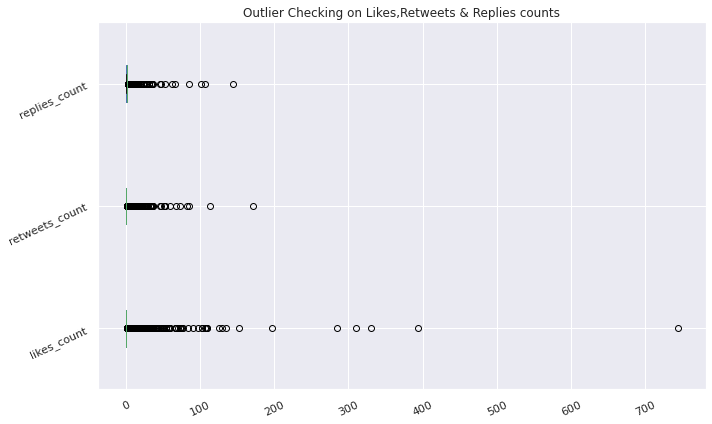

In [ ]:
mydata=data[['likes_count', 'retweets_count', 'replies_count']]
mydata.plot(kind='box',title='Outlier Checking on Likes,Retweets & Replies counts',vert=0,figsize=(10,6))
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.tight_layout()
plt.show()

The outliers are so large that the scale of our boxplots is compromised.

Let's take a look at the data associated with these outliers. From the graph above, we can see that the begin at over 400 replies (safe bet that these tweets are also the ones with the large retweets).

In [ ]:
data[data['likes_count']>300]

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner
453,2021-10-22,744,145,171,The CID has come alive. They are investigating...,ngarivhumejacob,[],0
4809,2021-05-22,394,31,48,This demonization of @EcoCashZW when we know w...,advocatemahere,['ecocashzw'],0
5770,2021-05-19,310,66,83,How to make money in Zimbabwe: \n\n- Get an Ag...,ptchimusoro,['ecocashzw'],0
113350,2020-11-18,330,101,85,Shity ecocash what does this even mean. Fire y...,josephmakuni,"['ecocashzw', 'econetzimbabwe', 'econet_support']",0


Only six rows are returned. Let us investigate the text and see what they contain. (Note that this is also the tweets responsible for the retweets outlier)

In [ ]:
data[data['likes_count']>300]['tweet']

453       The CID has come alive. They are investigating...
4809      This demonization of @EcoCashZW when we know w...
5770      How to make money in Zimbabwe: \n\n- Get an Ag...
113350    Shity ecocash what does this even mean. Fire y...
Name: tweet, dtype: object

The tweets seems to contain a retweets which were not loaded fully. Let's delete it all the same as it does not provide any useful information for us.

In [ ]:
data = data[data['likes_count']<300]

In [ ]:
data[data['likes_count']>300]

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner


The tweet no longer exists in our dataframe. Let's plot our box plot again.

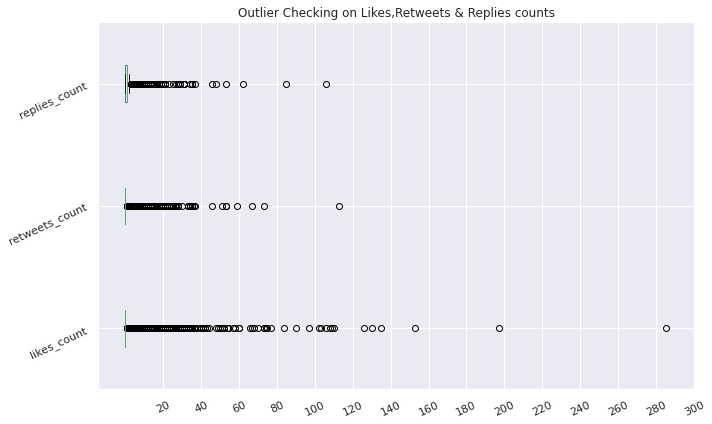

In [ ]:
mydata=data[['likes_count', 'retweets_count', 'replies_count']]
mydata.plot(kind='box',title='Outlier Checking on Likes,Retweets & Replies counts',vert=0,figsize=(10,6))
plt.xticks([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280,300])    # changing x scale by own
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.tight_layout()
plt.show()

Three tweet with over 140 like still exists. Let's also take a look at it.

In [ ]:
data[data['likes_count']>140]

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner
4570,2021-05-23,153,8,21,So a top official of @EcoCashZW who is a membe...,pedzisairuhanya,['ecocashzw'],0
4837,2021-05-22,197,35,67,1. The Financial Intelligence Unit is charging...,daddyhope,['ecocashzw'],0
226552,2020-03-25,285,106,20,hie @EcoCashZW @econet_support l bought $1 dai...,faffiemanhuhwa,"['ecocashzw', 'econet_support']",0


The tweet is instructing tweeter users to retweet a #Twimbos harshtag. It's also safe to drop it.


In [ ]:
data = data[data['likes_count']<140]

In [ ]:
data[data['likes_count']>140]

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner


The tweet has been deleted.

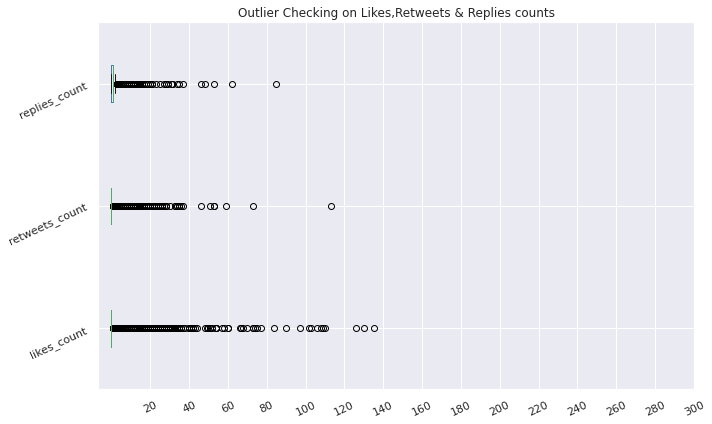

In [ ]:
mydata=data[['likes_count', 'retweets_count', 'replies_count']]
mydata.plot(kind='box',title='Outlier Checking on Likes,Retweets & Replies counts',vert=0,figsize=(10,6))
plt.xticks([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280,300])    # changing x scale by own
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.tight_layout()
plt.show()

As seen in the box plots above, our data still contains a lot of outliers. Let's investigate all tweets with likes over 250, to begin with.

In [ ]:
data[data['likes_count']>120].head()

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner
613,2021-10-19,130,6,25,Can we have an ecocash or bank account for the...,drjaytee87,"[{'screen_name': 'tinochiremba', 'name': 'tino...",0
7939,2021-05-08,126,37,28,The @ReserveBankZIM Governor has labelled @Eco...,daddyhope,"['reservebankzim', 'ecocashzw']",0
204351,2020-04-23,135,48,37,Hello @EcoCashZW I bought electricity using ...,zenzele,"['ecocashzw', 'econet_support']",0


A quick scroll through the tweets shows that they are very legitimate.

Let's check for all rows that contain the phrases 'internet shutdown', 'shutdownzimbabwe', 'whiletheinternetwasoff', etc. so that we can remove them as they may distort or introduce moise in our data

In [ ]:
def find_key_words_2(x):
    r = re.compile(r'\#whiletheinternetwasoff | \#shutdownzimbabwe', flags=re.I | re.X)
    if r.findall(x):
        return 1
    else:
        return 0

In [ ]:
data['key_word_cleaner_2'] = data['tweet'].apply(find_key_words_2)

In [ ]:
data[data['key_word_cleaner_2']==1].head()

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2
18696,2021-03-23,0,0,1,No goin back on #ShutDownZimbabwe2016 on Wed 1...,bornfreezim,"['ntandon', 'kangara89', 'ecocashzw', 'econet_...",0,1
73486,2021-03-23,0,0,1,No goin back on #ShutDownZimbabwe2016 on Wed 1...,bornfreezim,"['ntandon', 'kangara89', 'ecocashzw', 'econet_...",0,1
91650,2021-01-13,0,0,1,No goin back on #ShutDownZimbabwe2016 on Wed 1...,bornfreezim,"['tmafundikwa', 'ecocashzw', 'econet_support',...",0,1
94780,2020-12-28,0,0,1,No goin back on #ShutDownZimbabwe2016 on Wed 1...,bornfreezim,"['chumet_', '263chat', 'econet_support', 'ecoc...",0,1
97712,2020-12-17,0,0,1,No goin back on #ShutDownZimbabwe2016 on Wed 1...,bornfreezim,"['lebirdchief', 'the_thinker_ii', 'allngulube1...",0,1


In [ ]:
data[data['key_word_cleaner_2']==1].shape[0]

11

The data returned above is that with the hashtags #shutdownzimbabwe and #WhileTheInternetWasOff. There are only 11 rows. However, I believe there are more tweets about the shutdown in the dataframe.

##Import Active Mobile Money Subscribers Data

We now have to import the data for active mobile subscribers for the three Mobile Money Operators (MMO) that is Ecocash, Onemoney and Telecash. This data was obtained from POTRAZ Quaterly Reports from 2016 to 2020.

In [ ]:
mmnsdata = pd.read_csv('/content/drive/My Drive/MobileMoneyOperators_Data2.csv')


Now lets perform some EDA on the Active Mobile Money Subscribers data.

Lets start by displaying the head of the data.

In [ ]:
mmnsdata.head()

,Period,Ecocash,Telecash,OneMoney
0,Q1_2016,3121683,64905,12980
1,Q2_2016,3176090,34112,10857
2,Q3_2016,3260270,62601,11093
3,Q4_2016,3245405,49549,8234
4,Q1_2017,3189611,52076,10097


In [ ]:
mmnsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Period    20 non-null     object
 1   Ecocash   20 non-null     int64 
 2   Telecash  20 non-null     int64 
 3   OneMoney  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [ ]:
mmnsdata.describe(include='all')

,Period,Ecocash,Telecash,OneMoney
count,20,2.000000e+01,20.000000,20.000000
unique,20,NaN,NaN,NaN
top,Q3_2018,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,5.050135e+06,99992.600000,233916.050000
std,NaN,1.468103e+06,197512.587152,279260.778622
min,NaN,3.121683e+06,19198.000000,5222.000000
25%,NaN,3.286062e+06,52442.000000,12508.250000
50%,NaN,5.427270e+06,54039.500000,115691.500000
75%,NaN,6.367791e+06,68223.750000,358481.250000


###Merging Active Mobile Subscriber data with Twitter data

Defining labeller function for OneMoney

In [ ]:

def labeller_OneMoney(x):
    if (re.search('2016-01', x) or re.search('2016-02', x)) or (re.search('2016-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2016']['OneMoney'].values[0]
    elif (re.search('2016-04', x) or re.search('2016-05', x)) or (re.search('2016-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2016']['OneMoney'].values[0]
    elif (re.search('2016-07', x) or re.search('2016-08', x)) or (re.search('2016-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2016']['OneMoney'].values[0]
    elif (re.search('2016-10', x) or re.search('2016-11', x)) or (re.search('2016-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2016']['OneMoney'].values[0]
        #-----------------------2017-----------------------------------------------------#
    elif (re.search('2017-01', x) or re.search('2017-02', x)) or (re.search('2017-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2017']['OneMoney'].values[0]
    elif (re.search('2017-04', x) or re.search('2017-05', x)) or (re.search('2017-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2017']['OneMoney'].values[0]
    elif (re.search('2017-07', x) or re.search('2017-08', x)) or (re.search('2017-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2017']['OneMoney'].values[0]
    elif (re.search('2017-10', x) or re.search('2017-11', x)) or (re.search('2017-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2017']['OneMoney'].values[0]
        #---------------------2018-------------------------------------------------------#
    elif (re.search('2018-01', x) or re.search('2018-02', x)) or (re.search('2018-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2018']['OneMoney'].values[0]
    elif (re.search('2018-04', x) or re.search('2018-05', x)) or (re.search('2018-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2018']['OneMoney'].values[0]
    elif (re.search('2018-07', x) or re.search('2018-08', x)) or (re.search('2018-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2018']['OneMoney'].values[0]
    elif (re.search('2018-10', x) or re.search('2018-11', x)) or (re.search('2018-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2018']['OneMoney'].values[0]
        #---------------------2019-------------------------------------------------------#
    elif (re.search('2019-01', x) or re.search('2019-02', x)) or (re.search('2019-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2019']['OneMoney'].values[0]
    elif (re.search('2019-04', x) or re.search('2019-05', x)) or (re.search('2019-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2019']['OneMoney'].values[0]
    elif (re.search('2019-07', x) or re.search('2019-08', x)) or (re.search('2019-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2019']['OneMoney'].values[0]
    elif (re.search('2019-10', x) or re.search('2019-11', x)) or (re.search('2019-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2019']['OneMoney'].values[0]
       #---------------------2020--------------------------------------------------------#
    elif (re.search('2020-01', x) or re.search('2020-02', x)) or (re.search('2020-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2020']['OneMoney'].values[0]
    elif (re.search('2020-04', x) or re.search('2020-05', x)) or (re.search('2020-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2020']['OneMoney'].values[0]
    elif (re.search('2020-07', x) or re.search('2020-08', x)) or (re.search('2020-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2020']['OneMoney'].values[0]
    elif (re.search('2020-10', x) or re.search('2020-11', x)) or (re.search('2020-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2020']['OneMoney'].values[0]
       #--------------------2021---------------------------------------------------------#
    else:
        return 0

Defining labeller function for Ecocash

In [ ]:

def labeller_Ecocash(x):
    if (re.search('2016-01', x) or re.search('2016-02', x)) or (re.search('2016-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2016']['Ecocash'].values[0]
    elif (re.search('2016-04', x) or re.search('2016-05', x)) or (re.search('2016-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2016']['Ecocash'].values[0]
    elif (re.search('2016-07', x) or re.search('2016-08', x)) or (re.search('2016-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2016']['Ecocash'].values[0]
    elif (re.search('2016-10', x) or re.search('2016-11', x)) or (re.search('2016-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2016']['Ecocash'].values[0]
        #-----------------------2017-----------------------------------------------------#
    elif (re.search('2017-01', x) or re.search('2017-02', x)) or (re.search('2017-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2017']['Ecocash'].values[0]
    elif (re.search('2017-04', x) or re.search('2017-05', x)) or (re.search('2017-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2017']['Ecocash'].values[0]
    elif (re.search('2017-07', x) or re.search('2017-08', x)) or (re.search('2017-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2017']['Ecocash'].values[0]
    elif (re.search('2017-10', x) or re.search('2017-11', x)) or (re.search('2017-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2017']['Ecocash'].values[0]
        #---------------------2018-------------------------------------------------------#
    elif (re.search('2018-01', x) or re.search('2018-02', x)) or (re.search('2018-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2018']['Ecocash'].values[0]
    elif (re.search('2018-04', x) or re.search('2018-05', x)) or (re.search('2018-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2018']['Ecocash'].values[0]
    elif (re.search('2018-07', x) or re.search('2018-08', x)) or (re.search('2018-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2018']['Ecocash'].values[0]
    elif (re.search('2018-10', x) or re.search('2018-11', x)) or (re.search('2018-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2018']['Ecocash'].values[0]
        #---------------------2019-------------------------------------------------------#
    elif (re.search('2019-01', x) or re.search('2019-02', x)) or (re.search('2019-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2019']['Ecocash'].values[0]
    elif (re.search('2019-04', x) or re.search('2019-05', x)) or (re.search('2019-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2019']['Ecocash'].values[0]
    elif (re.search('2019-07', x) or re.search('2019-08', x)) or (re.search('2019-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2019']['Ecocash'].values[0]
    elif (re.search('2019-10', x) or re.search('2019-11', x)) or (re.search('2019-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2019']['Ecocash'].values[0]
       #---------------------2020--------------------------------------------------------#
    elif (re.search('2020-01', x) or re.search('2020-02', x)) or (re.search('2020-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2020']['Ecocash'].values[0]
    elif (re.search('2020-04', x) or re.search('2020-05', x)) or (re.search('2020-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2020']['Ecocash'].values[0]
    elif (re.search('2020-07', x) or re.search('2020-08', x)) or (re.search('2020-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2020']['Ecocash'].values[0]
    elif (re.search('2020-10', x) or re.search('2020-11', x)) or (re.search('2020-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2020']['Ecocash'].values[0]
       #--------------------2021---------------------------------------------------------#
    else:
        return 0

Defining lebeller function for Telecash.

In [ ]:

def labeller_Telecash(x):
    if (re.search('2016-01', x) or re.search('2016-02', x)) or (re.search('2016-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2016']['Telecash'].values[0]
    elif (re.search('2016-04', x) or re.search('2016-05', x)) or (re.search('2016-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2016']['Telecash'].values[0]
    elif (re.search('2016-07', x) or re.search('2016-08', x)) or (re.search('2016-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2016']['Telecash'].values[0]
    elif (re.search('2016-10', x) or re.search('2016-11', x)) or (re.search('2016-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2016']['Telecash'].values[0]
        #-----------------------2017-----------------------------------------------------#
    elif (re.search('2017-01', x) or re.search('2017-02', x)) or (re.search('2017-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2017']['Telecash'].values[0]
    elif (re.search('2017-04', x) or re.search('2017-05', x)) or (re.search('2017-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2017']['Telecash'].values[0]
    elif (re.search('2017-07', x) or re.search('2017-08', x)) or (re.search('2017-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2017']['Telecash'].values[0]
    elif (re.search('2017-10', x) or re.search('2017-11', x)) or (re.search('2017-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2017']['Telecash'].values[0]
        #---------------------2018-------------------------------------------------------#
    elif (re.search('2018-01', x) or re.search('2018-02', x)) or (re.search('2018-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2018']['Telecash'].values[0]
    elif (re.search('2018-04', x) or re.search('2018-05', x)) or (re.search('2018-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2018']['Telecash'].values[0]
    elif (re.search('2018-07', x) or re.search('2018-08', x)) or (re.search('2018-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2018']['Telecash'].values[0]
    elif (re.search('2018-10', x) or re.search('2018-11', x)) or (re.search('2018-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2018']['Telecash'].values[0]
        #---------------------2019-------------------------------------------------------#
    elif (re.search('2019-01', x) or re.search('2019-02', x)) or (re.search('2019-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2019']['Telecash'].values[0]
    elif (re.search('2019-04', x) or re.search('2019-05', x)) or (re.search('2019-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2019']['Telecash'].values[0]
    elif (re.search('2019-07', x) or re.search('2019-08', x)) or (re.search('2019-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2019']['Telecash'].values[0]
    elif (re.search('2019-10', x) or re.search('2019-11', x)) or (re.search('2019-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2019']['Telecash'].values[0]
       #---------------------2020--------------------------------------------------------#
    elif (re.search('2020-01', x) or re.search('2020-02', x)) or (re.search('2020-03', x)):
        return mmnsdata[mmnsdata['Period']=='Q1_2020']['Telecash'].values[0]
    elif (re.search('2020-04', x) or re.search('2020-05', x)) or (re.search('2020-06', x)):
        return mmnsdata[mmnsdata['Period']=='Q2_2020']['Telecash'].values[0]
    elif (re.search('2020-07', x) or re.search('2020-08', x)) or (re.search('2020-09', x)):
        return mmnsdata[mmnsdata['Period']=='Q3_2020']['Telecash'].values[0]
    elif (re.search('2020-10', x) or re.search('2020-11', x)) or (re.search('2020-12', x)):
        return mmnsdata[mmnsdata['Period']=='Q4_2020']['Telecash'].values[0]
       #--------------------2021---------------------------------------------------------#
    else:
        return 0

Now lets apply the defined labeller functions for Ecocash, Telecash and OneMoney in order to merge the Active Mobile Subcriber data with the twitter data

In [ ]:
data["AMM_Ecocash"] = data['date'].apply(labeller_Ecocash)
data["AMM_Telecash"] = data['date'].apply(labeller_Telecash)
data["AMM_OneMoney"] = data['date'].apply(labeller_OneMoney)

In [ ]:
data.tail(5)

,date,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney
407725,2017-01-06,0,0,0,@econet_support guys may you please give me fe...,luvjiz52,['econet_support'],0,0,3189611,52076,10097
407759,2017-01-05,0,1,0,@econet_support you just took money from my ec...,luvjiz52,['econet_support'],0,0,3189611,52076,10097
407776,2017-01-05,0,1,0,@econet_support whats up with these random eco...,nhlallo,['econet_support'],0,0,3189611,52076,10097
407887,2017-01-01,0,0,0,@econet_support why am I charged $1.00 for the...,faraij,['econet_support'],0,0,3189611,52076,10097
407922,2017-01-01,0,1,0,@econet_support if i ecocash the wrong number ...,dorkatcooltable,['econet_support'],0,0,3189611,52076,10097


Let's make the 'date' column our index to make subsetting easier.

In [ ]:
data.set_index('date', inplace=True)

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data.head()

,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney
date,,,,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,[],0,0,0,0,0
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,[],0,0,0,0,0
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,[],0,0,0,0,0
2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,"[{'screen_name': 'ecocashzw', 'name': 'ecocash...",0,0,0,0,0
2021-10-30,3,0,0,@doughbyzo Do you do delivery and do you also ...,mrmuvezwa,[],0,0,0,0,0


In [ ]:
data.loc['2020-01'].sort_index().head()

,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney
date,,,,,,,,,,,
2020-01-01,0,0,0,I was trying to buy myself (0772978992) 1000mb...,marshallcumire,['econet_support'],0,0,7065382,52564,555255
2020-01-01,0,1,0,And then there was radio silence after my DM. ...,niashababe,"['elevateyouthzw', 'econet_support', 'ecocashzw']",0,0,7065382,52564,555255
2020-01-01,0,1,0,@econet_support even guys my need help...ndabl...,shaddybazaars,['econet_support'],0,0,7065382,52564,555255
2020-01-01,0,1,0,@EcoCashZW @econet_support evening ndatengera...,tessa_zwcitizen,"['ecocashzw', 'econet_support']",0,0,7065382,52564,555255
2020-01-01,0,0,0,@econet_support i bought the daily 1Gb bundle ...,marlvinchihota,['econet_support'],0,0,7065382,52564,555255


In [ ]:
def find_key_words_3(x):
    r = re.compile(r'\bblocking\b | \bblocked\b | \bblock\b | \bshutdown\b | \bshut\b | \bdown\b', flags=re.I | re.X)
    if r.findall(x):
        return 1
    else:
        return 0

In [ ]:
data['key_word_cleaner_3'] = data['tweet'].apply(find_key_words_3)

In [ ]:
data.loc['2020-01'][data.loc['2020-01']['key_word_cleaner_3']==1].shape

(35, 12)

We have found another 35 rows of data to remove.

In [ ]:
data = data[data['key_word_cleaner_3']==0]

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [ ]:
data.shape[0]

32773

Now back to our box plots.

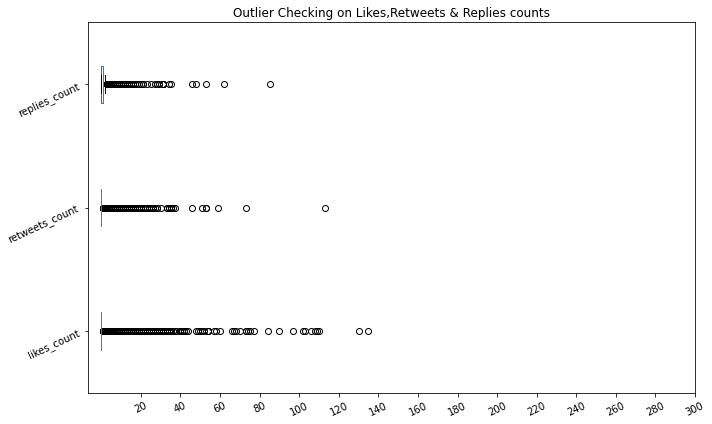

In [ ]:
mydata=data[['likes_count', 'retweets_count', 'replies_count']]
mydata.plot(kind='box',title='Outlier Checking on Likes,Retweets & Replies counts',vert=0,figsize=(10,6))
plt.xticks([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280,300])    # changing x scale by own
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.tight_layout()
plt.show()

In [ ]:
data[data['likes_count']>140].head()

,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,key_word_cleaner_3
date,,,,,,,,,,,,


Again, although the large number of likes and/or retweets signals a flag differentiating these tweets from the majority, the content says otherwise. What we can simply deduce from this is that these tweets contain content that resonated with more people than the ones found in our IQR.

For curiosity's sake, let's transform our likes, retweets and replies columns to a more shorter scale so that we can investigate the shape of the spread of our data.

In [ ]:
import numpy as np

data["log(likes)"] = data["likes_count"] + 7
data["log(likes)"] = data["log(likes)"].apply(np.log)

data["log(retweets)"] = data["retweets_count"] + 7
data["log(retweets)"] = data["log(retweets)"].apply(np.log)

data["log(replies)"] = data["replies_count"] + 7
data["log(replies)"] = data["log(replies)"].apply(np.log)

In [ ]:
data.head()

,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,key_word_cleaner_3,log(likes),log(retweets),log(replies)
date,,,,,,,,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,[],0,0,0,0,0,0,2.079442,1.94591,1.945910
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,[],0,0,0,0,0,0,1.945910,1.94591,2.197225
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,[],0,0,0,0,0,0,1.945910,1.94591,2.079442
2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,"[{'screen_name': 'ecocashzw', 'name': 'ecocash...",0,0,0,0,0,0,1.945910,1.94591,2.302585
2021-10-30,3,0,0,@doughbyzo Do you do delivery and do you also ...,mrmuvezwa,[],0,0,0,0,0,0,2.302585,1.94591,1.945910


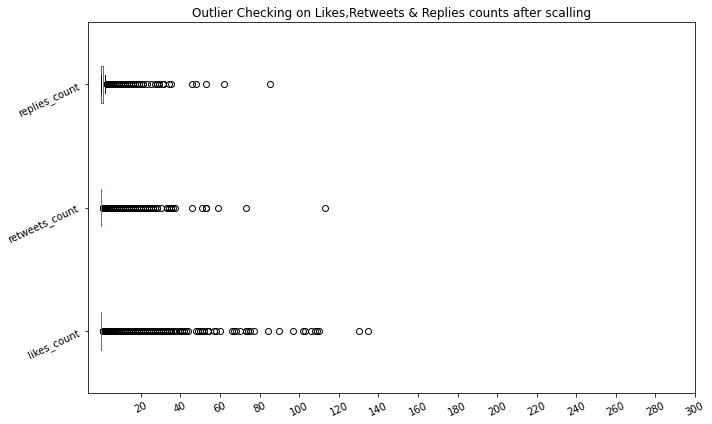

In [ ]:
mydata=data[['likes_count', 'retweets_count', 'replies_count']]
mydata.plot(kind='box',title='Outlier Checking on Likes,Retweets & Replies counts after scalling',vert=0,figsize=(10,6))
plt.xticks([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280,300])    # changing x scale by own
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.tight_layout()
plt.show()

For both likes and retweets, the data in the upper quartile seems to be more spread than that in the bottom. The replies seem to be more evenly balanced around the median. Let's get a rough idea of the number of outliers we've compared to the rest of our data.

In [ ]:
data.describe()

,likes_count,replies_count,retweets_count,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,key_word_cleaner_3,log(likes),log(retweets),log(replies)
count,32773.000000,32773.000000,32773.000000,32773.0,32773.000000,3.277300e+04,32773.000000,32773.000000,32773.0,32773.000000,32773.000000,32773.000000
mean,0.498520,0.939767,0.156348,0.0,0.000275,3.786591e+06,151982.231044,281691.097428,0.0,1.990910,1.960779,2.064853
std,3.251046,1.306000,1.540860,0.0,0.016570,3.030920e+06,316377.105022,348094.244472,0.0,0.166641,0.094965,0.107703
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.945910,1.945910,1.945910
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.945910,1.945910,1.945910
50%,0.000000,1.000000,0.000000,0.0,0.000000,5.452148e+06,34689.000000,5222.000000,0.0,1.945910,1.945910,2.079442
75%,0.000000,1.000000,0.000000,0.0,0.000000,6.530000e+06,53392.000000,555255.000000,0.0,1.945910,1.945910,2.079442
max,135.000000,85.000000,113.000000,0.0,1.000000,7.065382e+06,936479.000000,892963.000000,0.0,4.955827,4.787492,4.521789


In [ ]:
print('Outliers: {}'.format(data[data['log(likes)']>5.2].shape[0]))
print('Rest of data {}'.format(data.shape[0]-data[data['log(likes)']>5.2].shape[0]))

Outliers: 0
Rest of data 32773


Our descriptive stats show that 'key_word_cleaner_3' has a ma value of 0.

In [ ]:
data.shape[0]

32773

I just remembered that there is an ecosure account on twitter, as well as for elevateyouth. Let's see if there are any tweets associated with them.

In [ ]:
data[(data['username']=='EcoSureZW') | (data['username']=='elevateyouthzw')].head()

,likes_count,replies_count,retweets_count,tweet,username,mentions,key_word_cleaner,key_word_cleaner_2,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,key_word_cleaner_3,log(likes),log(retweets),log(replies)
date,,,,,,,,,,,,,,,


There are no tweets that exist.

We have cleaned our data by removing irrelevant rows to our analysis as much as possible given the information that we know so far. Further rows can be deleted later when new insights appear. For now, this is the best we can do.

Let's drop the columns that we no longer need.

In [ ]:
data.drop(columns=['key_word_cleaner', 'key_word_cleaner_2', 'key_word_cleaner_3',
       'log(likes)', 'log(retweets)', 'log(replies)','mentions'], inplace=True)

In [ ]:
data.head(3)

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney
date,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,0,0,0
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,0,0,0
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,0,0,0


### Cleaning tweet content

The content in our tweets is the one we're going to apply sentiment analysis to. However, it is not clean to immediately do classification on. To get the best possible results, we need to transform it.

In [ ]:
# import necessary packages

import string
import nltk

warnings.filterwarnings("ignore", category=DeprecationWarning)

***Removing: ***

*   Punctuations
*   Numbers
*   Special Characters



Punctuations, numbers and special characters do not help much with sentiment analysis. It is better to remove them from the text. Here we will replace everything except characters and hashtags, with spaces. We also want to remove hyperlinks and trailing 'co' and/or 'zw'. We also want to remove links to twitter pictures.

In [ ]:
data['tidy_tweet'] = data['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: re.sub(r'pic\.\S+', '', x))

In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
data['tidy_tweet'] = data['tidy_tweet'].apply(str.lower)

In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: re.sub(r'\bco\b|\bzw\b|twitter', '', x))

In [ ]:
data.head()

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet
date,,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,0,0,0,noblesavage car park in town ndinenge ndisin...
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,0,0,0,ecocashzw please do explain how do i access m...
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,0,0,0,tawandamaching cabszimbabwe ecocashzw hell...
2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,0,0,0,cabszimbabwe good day to your i sent zipit t...
2021-10-30,3,0,0,@doughbyzo Do you do delivery and do you also ...,mrmuvezwa,0,0,0,doughbyzo do you do delivery and do you also ...


**Tokenization**

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
data['tokenized_tweet'] = data['tidy_tweet'].apply(lambda x: x.split())
data.head()

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet
date,,,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,0,0,0,noblesavage car park in town ndinenge ndisin...,"[noblesavage, car, park, in, town, ndinenge, n..."
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,0,0,0,ecocashzw please do explain how do i access m...,"[ecocashzw, please, do, explain, how, do, i, a..."
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,0,0,0,tawandamaching cabszimbabwe ecocashzw hell...,"[tawandamaching, cabszimbabwe, ecocashzw, hell..."
2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,0,0,0,cabszimbabwe good day to your i sent zipit t...,"[cabszimbabwe, good, day, to, your, i, sent, z..."
2021-10-30,3,0,0,@doughbyzo Do you do delivery and do you also ...,mrmuvezwa,0,0,0,doughbyzo do you do delivery and do you also ...,"[doughbyzo, do, you, do, delivery, and, do, yo..."


Our tweets are now much cleaner and better to apply a sentiment analysis algorithm on. However, we still don't know which tweets belong to which mobile money operator. Let's find a way to label the tweets.

 - ecocash: 'e'
 - onemoney or telecash: 'c'
 - other: 0

If a tweet contains 'ecocash', 'onemoney' and\or 'telecash' within it, we attribute the tweet as a complaint to ecocash and a threat to switch to another provider.

In [ ]:
def labeller(x):
    if (re.search('ecocash', x) and re.search('onemoney', x)) or (re.search('ecocash', x) and re.search('telecash', x)):
        return 'e'
    elif  re.search('ecocash', x) or re.search('steward', x) or re.search('cassava', x):
        return 'e'
    elif re.search('telecash', x) or re.search('onemoney', x):
        return 'c'
    else:
        return 0

In [ ]:
data["MMoneyOperator_label"] = data['tidy_tweet'].apply(labeller)

In [ ]:
data['MMoneyOperator_label'].value_counts()

e    32487
c      197
0       89
Name: MMoneyOperator_label, dtype: int64

In [ ]:
data[data['MMoneyOperator_label']==0].tail(10)

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet,MMoneyOperator_label
date,,,,,,,,,,,
2019-05-12,0,0,0,"Hi, for terms and conditions of the promotion ...",ecocashzw,6643008,54190,335132,hi for terms and conditions of the promotion ...,"[hi, for, terms, and, conditions, of, the, pro...",0
2019-05-10,0,0,0,You need a minimum of 5 points to stand a chan...,ecocashzw,6643008,54190,335132,you need a minimum of points to stand a chan...,"[you, need, a, minimum, of, points, to, stand,...",0
2018-09-24,0,1,0,@econet_support bought 2gig data early this mr...,itsemantee,6017685,52863,181990,econet support bought gig data early this mr...,"[econet, support, bought, gig, data, early, th...",0
2018-09-17,0,0,0,Hi SterKinetar. Please take the opportunity to...,ecocashzw,6017685,52863,181990,hi sterkinetar please take the opportunity to...,"[hi, sterkinetar, please, take, the, opportuni...",0
2018-09-17,0,0,0,Hi Hon Mapahla. Please take the opportunity to...,ecocashzw,6017685,52863,181990,hi hon mapahla please take the opportunity to...,"[hi, hon, mapahla, please, take, the, opportun...",0
2018-05-05,0,1,1,Chakachaya for real loving this promotion bn r...,yeyendlovu,5402393,79703,152415,chakachaya for real loving this promotion bn r...,"[chakachaya, for, real, loving, this, promotio...",0
2018-02-23,0,0,0,online transaction failed Number:0774408349.Vi...,samuraironald,4847014,79643,78968,online transaction failed number vi...,"[online, transaction, failed, number, virtualc...",0
2017-06-03,0,1,0,Hi @OarabileOsborne @econet_support @econetzim...,ecocashzw,3294659,54680,13137,hi oarabileosborne econet support econetzim...,"[hi, oarabileosborne, econet, support, econetz...",0
2017-04-27,0,1,0,@econet_support what is needed to integrate yo...,indundimag,3294659,54680,13137,econet support what is needed to integrate yo...,"[econet, support, what, is, needed, to, integr...",0


The tweets which do not contain either 'ecocash', 'telecash' or 'onemoney' seem to be replies to tweets to econet. Let's drop them since they'd simply be a duplication of the original tweet in terms of value counts

In [ ]:
data.shape[0]

32773

In [ ]:
data = data[data['MMoneyOperator_label'] != 0]

In [ ]:
data.shape[0]

32684

**Language Checking**

We;re almost done with cleaning our text. However, we are aware that our tweets contain english, shona and'or ndebele. Although, the sentiment analyzer we're going to use skips over non-english words and looks for sentiment in the available english ones, this might not be accurate enough. Since there are no translators good enough to convert shona\ndebele to english at the moment, we might need to drop the rows which have too much vernecular. Let's build a function that does this for us.

In [ ]:
!apt update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
!apt install enchant --fix-missing

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 85 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 amd64 0.60.7~20110707-4ubuntu0.2 [310 kB]
Get:3 h

In [ ]:
!pip install pyenchant
import enchant


In [ ]:
def lang_checker(x):
    d = enchant.Dict("en_US")
    en_count=0
    sn_count=0
    for i in x:
        if d.check(i) is True:
            en_count+=1
        else:
            sn_count+=1
    if en_count>=sn_count:
        return True
    else:
        return False

In [ ]:
!pip install deep_translator

     |████████████████████████████████| 97 kB 3.1 MB/s 
     |████████████████████████████████| 97 kB 5.3 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [ ]:
from deep_translator import GoogleTranslator
#print(GoogleTranslator('auto','en').translate('Huya Kuno'))

#dat=GoogleTranslator('auto','en').translate(data['tidy_tweet'])

#data['tidy_tweet'] = GoogleTranslator('auto','en').translate(data['tidy_tweet'])
#data.head()

if data['tidy_tweet'].apply(lang_checker)==False:
  data['tidy_tweet'] = GoogleTranslator('auto','en').translate(data['tidy_tweet'])

#if (df['price'] < 100000).all():
 # print(df)

In [ ]:
data['lang'] = data['tokenized_tweet'].apply(lang_checker)

In [ ]:
data.head()

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet,MMoneyOperator_label,lang
date,,,,,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,0,0,0,noblesavage car park in town ndinenge ndisin...,"[noblesavage, car, park, in, town, ndinenge, n...",e,True
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,0,0,0,ecocashzw please do explain how do i access m...,"[ecocashzw, please, do, explain, how, do, i, a...",e,True
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,0,0,0,tawandamaching cabszimbabwe ecocashzw hell...,"[tawandamaching, cabszimbabwe, ecocashzw, hell...",e,True
2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,0,0,0,cabszimbabwe good day to your i sent zipit t...,"[cabszimbabwe, good, day, to, your, i, sent, z...",e,True
2021-10-30,3,0,0,@doughbyzo Do you do delivery and do you also ...,mrmuvezwa,0,0,0,doughbyzo do you do delivery and do you also ...,"[doughbyzo, do, you, do, delivery, and, do, yo...",e,True


In [ ]:
"There are {} majority english tweets and {} majority non-english tweets.".format(data[data['lang']==True].shape[0], data[data['lang']==False].shape[0])

'There are 28455 majority english tweets and 4229 majority non-english tweets.'

We've got 348 non-english tweets in our data still. To avoid false positives when we carry out our sentiment analysis, let's drop them.

In [ ]:
dat_conv=data[data['lang']==False]
dat_conv

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet,MMoneyOperator_label,lang
date,,,,,,,,,,,,
2021-10-30,1,0,0,@drjaytee87 @DarkForceGirl01 vakuona kuona fac...,eng_brianm,0,0,0,drjaytee darkforcegirl vakuona kuona fac...,"[drjaytee, darkforcegirl, vakuona, kuona, face...",e,False
2021-10-30,1,1,0,@shanon_the_gem Ini ndinotoipiwa ndisina kuiku...,moyoabigail2,0,0,0,shanon the gem ini ndinotoipiwa ndisina kuiku...,"[shanon, the, gem, ini, ndinotoipiwa, ndisina,...",e,False
2021-10-30,1,0,0,Hunza ecocash number. https://t.co/bOfTXoCNdG,drankoceann,0,0,0,hunza ecocash number,"[hunza, ecocash, number]",e,False
2021-10-29,1,1,0,@Tynoe97 bhoo wangu ecocash ukuiziva,lionel_sauro,0,0,0,tynoe bhoo wangu ecocash ukuiziva,"[tynoe, bhoo, wangu, ecocash, ukuiziva]",e,False
2021-10-29,2,0,0,@smileessM @Dipholo_TJ Eseng ba nhlolise... ha...,nthawbiee,0,0,0,smileessm dipholo tj eseng ba nhlolise ha...,"[smileessm, dipholo, tj, eseng, ba, nhlolise, ...",e,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-03,0,0,0,@econet_support ehh guys refund yangu isai hen...,kudzi3_b3rry,3189611,52076,10097,econet support ehh guys refund yangu isai hen...,"[econet, support, ehh, guys, refund, yangu, is...",e,False
2017-01-29,0,1,0,@econet_support :-):-) tryng to move ec...,divantierukwav1,3189611,52076,10097,econet support tryng to move ec...,"[econet, support, tryng, to, move, ecocash, ac...",e,False
2017-01-26,3,0,2,Econet Wireless maintains top position http:/...,fingazlive,3189611,52076,10097,econet wireless maintains top position lov...,"[econet, wireless, maintains, top, position, l...",e,False


In [ ]:
from deep_translator import GoogleTranslator
#data['tokenized_tweet'] = GoogleTranslator('auto','en').translate(data['tidy_tweet'])

#data["tidy_tweet"]=dat_conv["tidy_tweet"].apply(lambda x:GoogleTranslator(source='auto', target='en').translate(x))

dat_conv["tidy_tweet"]=dat_conv["tidy_tweet"].apply(lambda x:GoogleTranslator(source='auto', target='en').translate(x))

#data.loc[:,"tidy_tweet"] = GoogleTranslator('yo', 'en').translate_batch(list(data.loc[:,"tidy_tweet"]))

In [ ]:
#data[data['tokenized_tweet']] = GoogleTranslator('auto','en').translate(data['tokenized_tweet'])

t=[]
l=[]
h=0
g=list(dat_conv['tidy_tweet'])

while h<len(g):
    for i in g:
      #gf=i+" " +(dat_conv['Name'][h])
      #t.append(gf)
      hg=GoogleTranslator('auto','en').translate(data['tidy_tweet'][h])
      #l.append([dat_conv['tidy_tweet'][h],GoogleTranslator('auto','en').translate(data['tokenized_tweet'])[h])
      l.append(hg)
    h+=1
print("The presidents which were assissinated are : ")
df22=pd.DataFrame(l,columns=["tidy_tweet","tokenized_tweet"])
df22


In [ ]:
data = data[data['lang']==True]

In [ ]:
data.shape[0]

28455

We can now say with some confidence our data has english tweets in it.

**Understanding the common words used in the tweets: WordCloud**

Let's visualize our most common words so that we can have an idea of which words occur the most in our tweets. We can proceed to clean out some of these words or even delete entire tweets we deem unnecessary to our analysis. One way to do this is to use a wordcloud.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

In [ ]:
import cv2

from urllib.request import urlopen
from wordcloud import ImageColorGenerator

In [ ]:
def load_mask(mask_url):
    with urlopen(mask_url) as response:
        mask = np.asarray(bytearray(response.read()), dtype="uint8")
        mask = cv2.imdecode(mask, cv2.IMREAD_COLOR)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    return mask

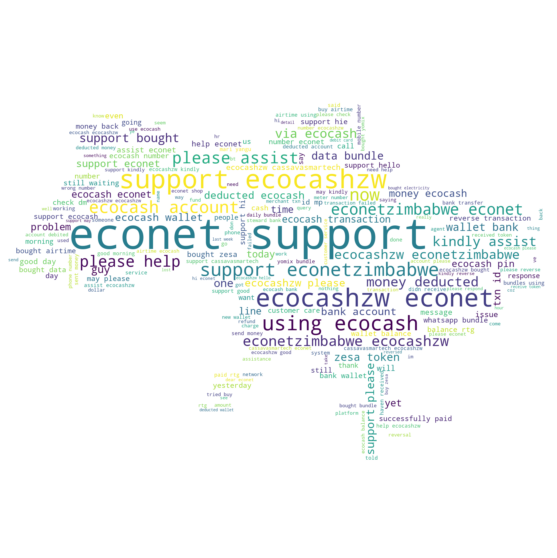

In [ ]:
all_words = ' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
mask = load_mask("https://i.imgur.com/UVe6Nas.png")
wordcloud = WordCloud( background_color="white",mask=mask, width=1500, height=1000, random_state=21, max_font_size=150).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see from our wordcloud that econet is overwhelmigly in the lead when it comes to word count. However, there are other variations of econet like 'econetzimbabwe' and 'econet support'. Let's delete their suffixes so that we remain with one instance of econet. We can also delete extensions to words like telecash, onemoney, etc.

In [ ]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: re.sub(r'zimbabwe|\bwireless\b|\brt\b|\bmb\b|\bre\b|bank|\bzim\b|cellular|media|bundle|\bshop\b|\bgo\b', '', x))

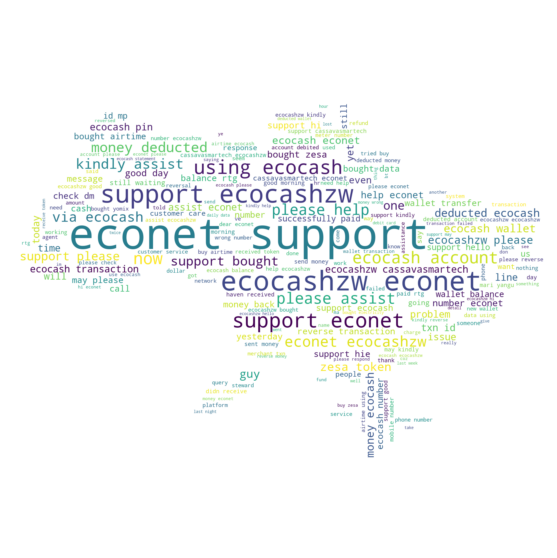

In [ ]:
all_words = ' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
mask = load_mask("https://i.imgur.com/UVe6Nas.png")
wordcloud = WordCloud( background_color="white",mask=mask, width=1500, height=1000, random_state=21, max_font_size=150).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We've done all we reasonably can to remove data that isn't relevant to our analysis. To remove any remaining noise, let's apply a sentiment analysis algorithm to the remaining data to pick up data with a positive sentiment. This data is of no use to use since we want tweets that either represent enquiries to a service provider, or a complaint.

To classify our tweets, we're going to use the nltk classifier model from 'https://text-processing.com'. Our data has no labels, therefore, we cannot train it to predict sentiment values. *We could but it would require a lot more effort. There's an easier way.* We will use the API from the aforementioned site on our tweets. Having tested it, I am confident it wil produce good results.

In [ ]:
nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
pol_score = []
for tweet in data['tweet']:
    sent = sia.polarity_scores(tweet)
    pol_score.append(sent)

In [ ]:
pol = pd.DataFrame(pol_score)
pol.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.072,0.852,0.075,0.0258
2,0.000,0.787,0.213,0.4019
3,0.066,0.598,0.335,0.8625
4,0.000,0.794,0.206,0.3818


In [ ]:
data['tweet'][3]

'@CabsZimbabwe Good day to your. I sent Zipit to a wrong Ecocash number and have since engaged @EcoCashZW to solve the issue and they requested for a STAN and RRN number. Kindly check your DM for details. Thank you.'

In [ ]:
data['pol_score'] = list(pol['compound'])

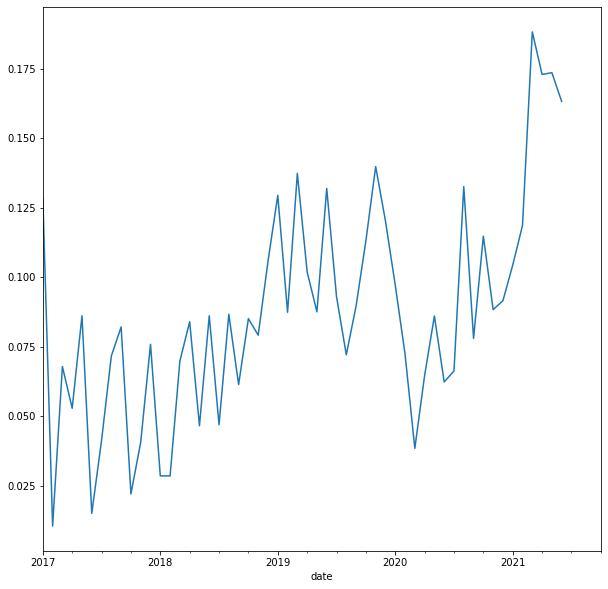

In [ ]:
#Plotting Average daily Sentiments
data['pol_score'].resample('M').mean().plot(figsize=(10,10))
plt.show()

In [ ]:
#Categorising Tweet Sentiments
data['sentiment'] = np.where(data['pol_score']<0,'negative',np.where(data['pol_score']>0,'positive','neutral'))

In [ ]:
data_neg = data[data['sentiment']=='negative']
data_pos = data[data['sentiment']=='positive']
data_neu = data[data['sentiment']=='neutral']

In [ ]:
data.head()

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet,MMoneyOperator_label,lang,pol_score,sentiment
date,,,,,,,,,,,,,,
2021-10-30,1,0,0,@_NobleSavage Car park in town ndinenge ndisin...,niggamumu,0,0,0,noblesavage car park in town ndinenge ndisin...,"[noblesavage, car, park, in, town, ndinenge, n...",e,True,0.0000,neutral
2021-10-30,0,2,0,@EcoCashZW please do explain how do I access m...,faithsharleen,0,0,0,ecocashzw please do explain how do i access m...,"[ecocashzw, please, do, explain, how, do, i, a...",e,True,0.0258,positive
2021-10-30,0,1,0,@TAWANDAMACHING4 @CabsZimbabwe @EcoCashZW Hell...,ecocash40541216,0,0,0,tawandamaching cabs ecocashzw hello inbox ...,"[tawandamaching, cabszimbabwe, ecocashzw, hell...",e,True,0.4019,positive
2021-10-30,0,3,0,@CabsZimbabwe Good day to your. I sent Zipit t...,tawandamaching4,0,0,0,cabs good day to your i sent zipit to a wron...,"[cabszimbabwe, good, day, to, your, i, sent, z...",e,True,0.8625,positive
2021-10-30,3,0,0,@doughbyzo Do you do delivery and do you also ...,mrmuvezwa,0,0,0,doughbyzo do you do delivery and do you also ...,"[doughbyzo, do, you, do, delivery, and, do, yo...",e,True,0.3818,positive


Let's take a look at the unique value counts of the values in the sentiment column.

In [ ]:
data['sentiment'].value_counts()

positive    14342
negative     7754
neutral      6359
Name: sentiment, dtype: int64

In [ ]:
def word_cloud(tweet):
    x, y = np.ogrid[:300, :300]
    mask = (x - 150)** 2 + (y-150)**2 >130 ** 2
    mask = 255 * mask.astype(int)
    word_cloud = WordCloud(width=2000, height =2000, max_font_size=200,
                          background_color='black', max_words=2000, mask=mask,
                          contour_width=1, contour_color='steelblue',
                          colormap='nipy_spectral').generate(tweet)
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='hermite')
    plt.axis('off')
    plt.show()

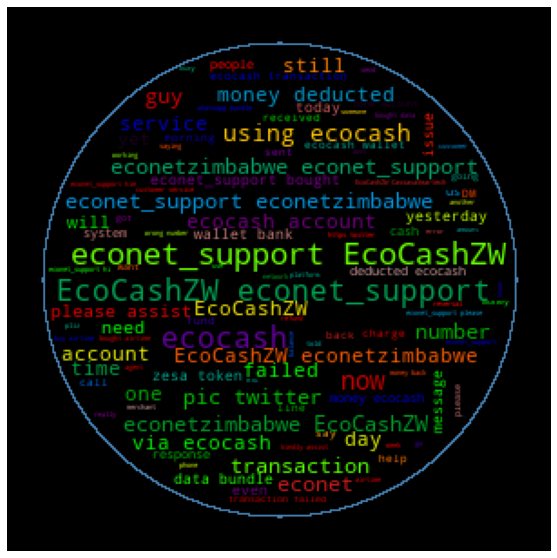

In [ ]:
# Wordcloud of negative tweets
word_cloud(pd.Series([text for text in data_neg.tweet]).str.cat(sep=' '))

In [ ]:
data.plot(kind='scatter',
                      x='Review_Total_Positive_Word_Counts',
                      y='Review_Total_Negative_Word_Counts',
                      label='Total reviews',
             s=data.Total_Number_of_Reviews/100,
             c='Reviewer_Score',
             cmap=plt.get_cmap('jet'),
             colorbar=True,
             alpha=0.4, figsize=(15,12),
             sharex=False, # label not showing up
             # https://stackoverflow.com/a/69661993/11105356
             )
font_size = 15
plt.title("Review Sentiment Distribution",  fontsize=font_size)
plt.xlabel("Total Positive Word Counts", fontsize=font_size)
plt.ylabel("Total Negative Word Counts",  fontsize=font_size)
plt.legend()
plt.show()

We've run quite a lot of code up to this point. Code we wouldn't want to run again for efficiency purposes. Let's save our current dataframe to a csv for reuse.

In [ ]:
data.to_csv('clean_data.csv')
from google.colab import files
files.download("clean_data.csv")
#,encoding = 'utf-8-sig'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.to_csv('/content/drive/My Drive/clean_data.csv')

#START RUNNING FROM HERE MR LEO

Lets import the cleaned data set.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

data = pd.read_csv('/content/drive/My Drive/ecocash_clean_data.csv')
mmnsdata = pd.read_csv('/content/drive/My Drive/MobileMoneyOperators_Data2.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28455 entries, 0 to 28454
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  28455 non-null  object 
 1   likes_count           28455 non-null  int64  
 2   replies_count         28455 non-null  int64  
 3   retweets_count        28455 non-null  int64  
 4   tweet                 28455 non-null  object 
 5   username              28454 non-null  object 
 6   AMM_Ecocash           28454 non-null  float64
 7   AMM_Telecash          28454 non-null  float64
 8   AMM_OneMoney          28454 non-null  float64
 9   tidy_tweet            28454 non-null  object 
 10  tokenized_tweet       28454 non-null  object 
 11  MMoneyOperator_label  28454 non-null  object 
 12  lang                  28454 non-null  object 
 13  pol_score             28454 non-null  float64
 14  sentiment             28454 non-null  object 
dtypes: float64(4), int6

In [ ]:
data.tail()

,date,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet,MMoneyOperator_label,lang,pol_score,sentiment
28450,1/7/2017,0,1,0,Hi @econetzimbabwe we paid our DSTV to the wro...,sharonmufaro,3189611.0,52076.0,10097.0,hi econet we paid our dstv to the wrong accou...,"['hi', 'econetzimbabwe', 'we', 'paid', 'our', ...",e,True,-0.5927,negative
28451,1/5/2017,0,1,0,@econet_support you just took money from my ec...,luvjiz52,3189611.0,52076.0,10097.0,econet support you just took money from my ec...,"['econet', 'support', 'you', 'just', 'took', '...",e,True,0.0000,neutral
28452,1/5/2017,0,1,0,@econet_support whats up with these random eco...,nhlallo,3189611.0,52076.0,10097.0,econet support whats up with these random eco...,"['econet', 'support', 'whats', 'up', 'with', '...",e,True,0.0000,neutral
28453,1/1/2017,0,0,0,@econet_support why am I charged $1.00 for the...,faraij,3189611.0,52076.0,10097.0,econet support why am i charged for the...,"['econet', 'support', 'why', 'am', 'i', 'charg...",e,True,-0.2023,negative
28454,1/1/2017,0,1,0,@econet_support if i ecocash the wrong number ...,dorkatcooltable,3189611.0,52076.0,10097.0,econet support if i ecocash the wrong number ...,"['econet', 'support', 'if', 'i', 'ecocash', 't...",e,True,-0.4215,negative


Let's consider the 'neg' and 'neutral' tweets as the tweets we're definitely sure we want.

We've done everything to clean our dataset. We can now begin our analysis.

### Customer complaints/enquiries by Mobile Money Operators

Let's begin by categorizing our data into respective Mobile Money Operators.

In [ ]:
data_ecocash = data[(data['MMoneyOperator_label']=='e') | (data['MMoneyOperator_label']=='ec')]
print('Ecocash has {} enquiries/complaints betweend Jan 2017 and Oct 2021'.format(data_ecocash.shape[0]))

Ecocash has 28295 enquiries/complaints betweend Jan 2017 and Oct 2021


In [ ]:
data_comp = data[data['MMoneyOperator_label']=='c']
print("Ecocash's competitors have a combined {} complaints/enquiries within the same period".format(data_comp.shape[0]))

Ecocash's competitors have a combined 159 complaints/enquiries within the same period


### Visualizing the data

Let's plot a daily time series of the customer enquiries over the years for Ecocash and its competitors.

First, we need to add an 'enquiry_count' column to our data which we can aggregate over.

In [ ]:
data.shape[0]

28455

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

%matplotlib inline

In [ ]:
count_array = np.full(28455, 1)

In [ ]:
data['enquiry_count'] = count_array

In [ ]:
data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index)

In [ ]:
data_ecocash = data[(data['MMoneyOperator_label']=='e')]
data_comp = data[data['MMoneyOperator_label']=='c']

In [ ]:
sns.set(rc={'figure.figsize':(12, 5)})

In [ ]:
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [ ]:
data_ecocash.sort_index(inplace=True)
data_comp.sort_index(inplace=True)

In [ ]:
data_ecocash.head(1)

,likes_count,replies_count,retweets_count,tweet,username,AMM_Ecocash,AMM_Telecash,AMM_OneMoney,tidy_tweet,tokenized_tweet,MMoneyOperator_label,lang,pol_score,sentiment,enquiry_count
date,,,,,,,,,,,,,,,
2017-01-01,0,1,0,@econet_support if i ecocash the wrong number ...,dorkatcooltable,3189611.0,52076.0,10097.0,econet support if i ecocash the wrong number ...,"['econet', 'support', 'if', 'i', 'ecocash', 't...",e,True,-0.4215,negative,1


In [ ]:
data_ecocash_monthly = data_ecocash[['enquiry_count']].resample("M").sum()
data_ecocash_monthly.head()

,enquiry_count
date,
2017-01-31,48
2017-02-28,81
2017-03-31,114
2017-04-30,79
2017-05-31,72


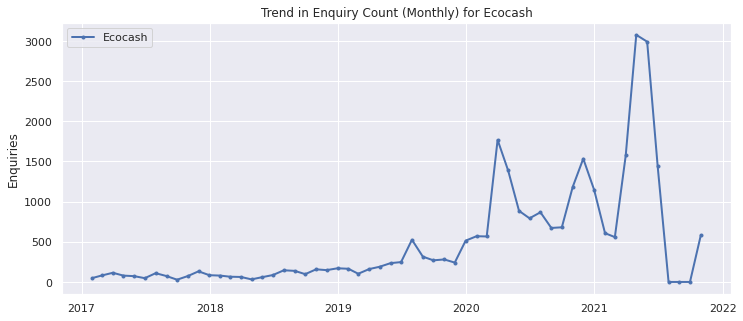

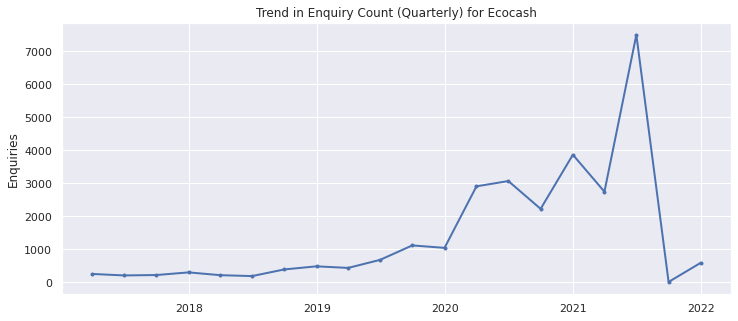

In [ ]:
ig1, ax1 = plt.subplots()
ax1.plot(data_ecocash['enquiry_count'].resample("M", convention='end').sum(), marker='.', linewidth=2, label="Ecocash")
ax1.set_ylabel("Enquiries")
ax1.set_title("Trend in Enquiry Count (Monthly) for Ecocash")
ax1.legend()
plt.grid(which='minor', axis='both')

fig2, ax2 = plt.subplots()
ax2.plot(data_ecocash['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Ecocash")
ax2.set_ylabel("Enquiries")
ax2.set_title("Trend in Enquiry Count (Quarterly) for Ecocash")


plt.grid(which='minor', axis='both')

 - The trend in both aggregations of by month and by quarter show that the enquiries are mostly average from 2017 to the first quarter of 2019.
 - From then on, there's a steady rise to 2020. The numbers take a sharp rise in the first quarter of 2020 then stabilize until the second quarter of 2020.
 - From here, the numbers takes some ups and downs up to the end of first quater of 2021, and then makes a sudden sharp rise through to end of second quater 2021.

##Complaints Count and Active Mobile Money Subscriptions trends

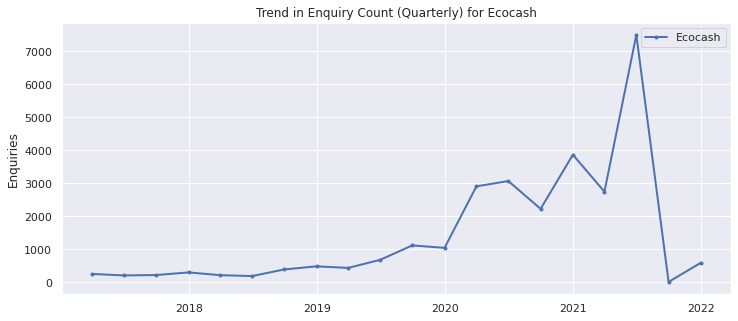

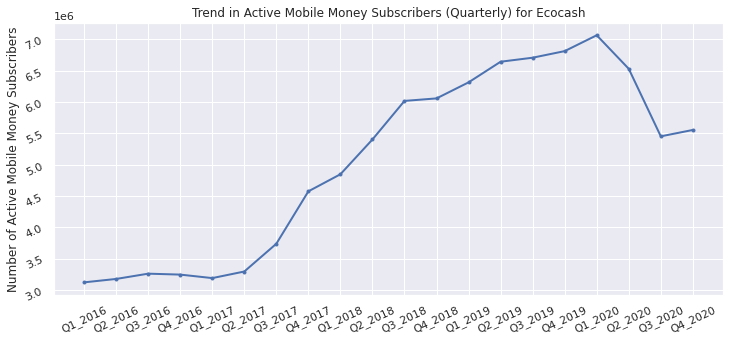

In [ ]:
fig1, ax1 = plt.subplots()
ax1.plot(data_ecocash['enquiry_count'].resample("Q", convention='end').sum(), marker='.', linewidth=2, label="Ecocash")
ax1.set_ylabel("Enquiries")
ax1.set_title("Trend in Enquiry Count (Quarterly) for Ecocash")
ax1.legend()
plt.grid(which='minor', axis='both')

fig2, ax2 = plt.subplots()
ax2.plot(mmnsdata['Period'],mmnsdata['Ecocash'], marker='.', linewidth=2, label="Ecocash")
ax2.set_ylabel("Number of Active Mobile Money Subscribers")
plt.xticks(rotation=25)
plt.yticks(rotation=25)
ax2.set_title("Trend in Active Mobile Money Subscribers (Quarterly) for Ecocash")


plt.grid(which='minor', axis='both')



*   From the Quarterly graphs above, we can see that there has been a steady rise in the number of complaints and a steep increase in Active Mobile Subscribers for Ecocash from 2016 to end of 2019.

*   However, there was sharp increase in complaints count from Q1, and Q2 2020 coupled with a deep fall in Active Mobile Money Subscribers for Ecocash within the same period.
*   Ecocash started to experience a steady rise in Active Mobile Money Subscribers from Q3 2020



An investigation of the sharp rise in number of complaints in 2020 and 2021

In [ ]:
import cv2

from urllib.request import urlopen
from wordcloud import ImageColorGenerator

In [ ]:
def load_mask(mask_url):
    with urlopen(mask_url) as response:
        mask = np.asarray(bytearray(response.read()), dtype="uint8")
        mask = cv2.imdecode(mask, cv2.IMREAD_COLOR)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    return mask

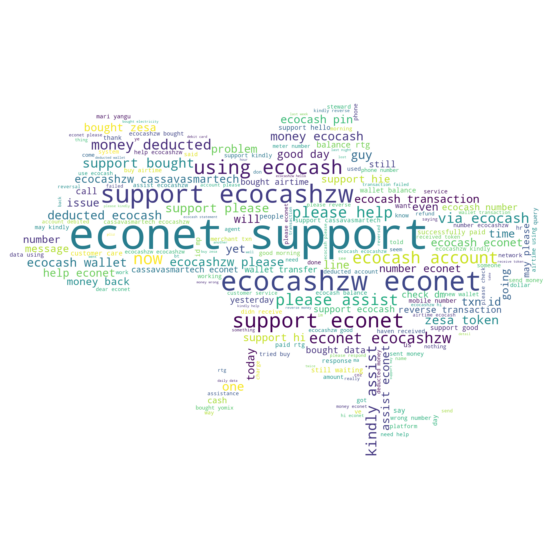

In [ ]:
all_words = ' '.join([text for text in data_ecocash['tidy_tweet']])
from wordcloud import WordCloud
mask = load_mask("https://i.imgur.com/UVe6Nas.png")
wordcloud = WordCloud( background_color="white",mask=mask, width=1500, height=1000, random_state=21, max_font_size=150).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The word cloud above has a lot of words in it. Let's list the ones that are most likely to be considered enquiries.

threats to switch to a competitor (telecel or netone)
steward bank

*   econet
*   ecocash
*   data
*   service
*   network




In [ ]:
def word_extract(x):
    words = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"steward|econet|whatsapp|data|ecocash|data|ecocashzw|service|zesa|network|cassavasmartech", i)
        words.append(ht)

    return words

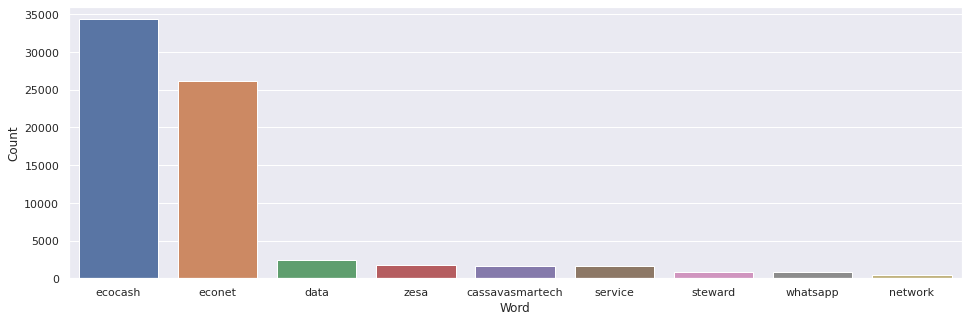

In [ ]:
import nltk
words = word_extract(data_ecocash['tidy_tweet'])

# unnesting list
words = sum(words,[])

a = nltk.FreqDist(words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
d.head()

,Word,Count
1,ecocash,34307
0,econet,26134
6,data,2485
5,zesa,1723
8,cassavasmartech,1651


In [ ]:
sum_count = sum(d['Count'])

In [ ]:
d['Percentage'] = (d['Count']/sum_count)*100
d['Percentage'] = d['Percentage'].apply(round)

In [ ]:
d.head()

,Word,Count,Percentage
1,ecocash,34307,49
0,econet,26134,37
6,data,2485,4
5,zesa,1723,2
8,cassavasmartech,1651,2


In [ ]:
d.at[3, 'Percentage'] = 14

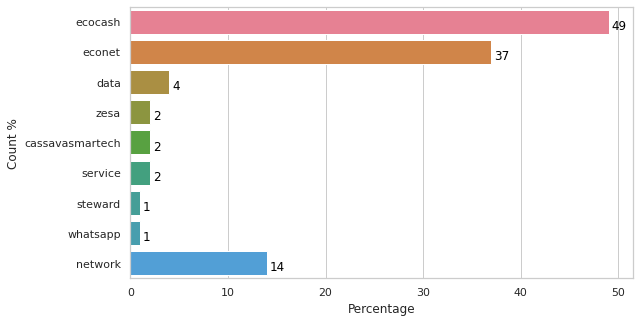

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Percentage", y = "Word", orient="h")
ax.set(ylabel = 'Count %')

for i, v in enumerate(d['Percentage']):
    ax.text(v + 0.3, i + .25, str(v), color='black')

plt.show()

*  Econet and Ecocash are the most prevalent complaint about Ecocash customers on twitter. They make up 49% and 37% respectively for all the complaint investigated. Majority of the complains seems to point out that Econet data is too expensive compared to its competitors Netone and Telecel. For Ecocash related complains, the standard-issue is on the system not working correctly.

In [ ]:
dat_month = data_ecocash[['enquiry_count']].resample('M').sum()

In [ ]:
dat_month.head()

,enquiry_count
date,
2017-01-31,48
2017-02-28,81
2017-03-31,114
2017-04-30,79
2017-05-31,72


In [ ]:
dat_month['month'] = dat_month.index.month_name()
dat_month.head()

,enquiry_count,month
date,,
2017-01-31,48,January
2017-02-28,81,February
2017-03-31,114,March
2017-04-30,79,April
2017-05-31,72,May


In [ ]:
high_month1 = dat_month.groupby('month').mean().sort_values(by='enquiry_count', ascending=False)

In [ ]:
high_month1['Percentage'] = (high_month1['enquiry_count']/high_month1['enquiry_count'].sum())*100

In [ ]:
high_month1.head()

,enquiry_count,Percentage
month,,
April,952.4,16.259774
May,848.2,14.480828
March,735.8,12.561888
June,522.0,8.911804
November,513.5,8.766688


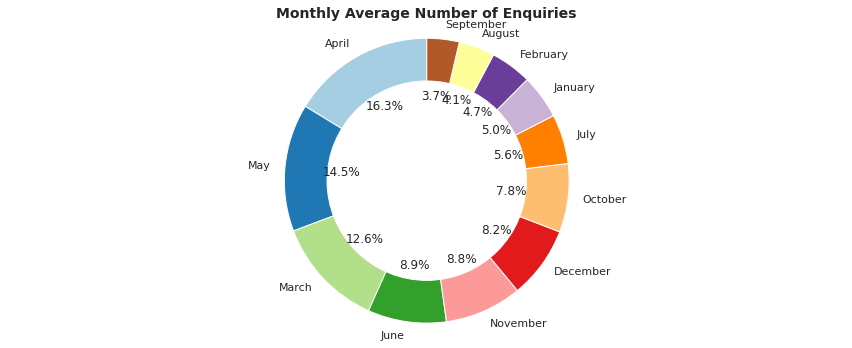

In [ ]:
sns.set_palette("Paired", 12)

fig3, ax3 = plt.subplots()
ax3.pie(high_month1['Percentage'], labels=high_month1.index, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')
ax3.set_title("Monthly Average Number of Enquiries", fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
dat_qata = data_ecocash[['AMM_Ecocash']].resample('Q').min()
dat_qata.head(3)

,AMM_Ecocash
date,
2017-03-31,3189611.0
2017-06-30,3294659.0
2017-09-30,3738056.0


In [ ]:
dat_qt = data_ecocash[['enquiry_count']].resample('Q').sum()
dat_qt.head(3)

,enquiry_count
date,
2017-03-31,243
2017-06-30,198
2017-09-30,210


In [ ]:
from sklearn.preprocessing import LabelEncoder
data2 = data[['likes_count', 'replies_count', 'retweets_count',
       'AMM_Ecocash', 'pol_score','sentiment', 'enquiry_count']]
le = LabelEncoder()
data2['sentiment'] = le.fit_transform(data2['sentiment'])

## Building the Model- LSTM_CNN

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Activation

In [ ]:
data2.tail()

,likes_count,replies_count,retweets_count,AMM_Ecocash,pol_score,sentiment,enquiry_count
date,,,,,,,
2017-01-07,0,1,0,3189611.0,-0.5927,0,1
2017-01-05,0,1,0,3189611.0,0.0000,1,1
2017-01-05,0,1,0,3189611.0,0.0000,1,1
2017-01-01,0,0,0,3189611.0,-0.2023,0,1
2017-01-01,0,1,0,3189611.0,-0.4215,0,1


In [ ]:
#Converting time series data to supervised learning problem
def timeseries_to_supervised(data2, in_=1, out=1, dropnan=True):
    n_vars = 1 if type(data2) is list else data2.shape[1]
    df = pd.DataFrame(data2)
    cols, names = list(), list()
    for i in range(in_, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
#log transform the data
def to_log(x):
    return np.log(x + 1)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

# configure network
n_epoch = 40
n_batch = 128
look_back = 120
look_forward = 120
test_size = 4000
n_batch_size = 100

#creating input data
X = timeseries_to_supervised(to_log(data2[['AMM_Ecocash']]), in_=look_back, out=look_forward, dropnan=True)

#creating train and test data
train, test = X[:-test_size], X[-test_size:]
X_train = train.iloc[:,:look_back]
y_train = train.iloc[:,-look_forward:]
X_test = test.iloc[:,:look_back]
y_test = test.iloc[:,-look_forward:]

# design network
model_LSTM_CNN = Sequential()

model_LSTM_CNN.add(Conv1D(filters=200, kernel_size=2, input_shape=(look_back,1), padding='same', activation='relu'))
model_LSTM_CNN.add(MaxPooling1D(pool_size=2))
model_LSTM_CNN.add(LSTM(100))
model_LSTM_CNN.add(Dropout(0.2))
model_LSTM_CNN.add(Dense(100))
model_LSTM_CNN.add(Dropout(0.2))
model_LSTM_CNN.add(Dense(100))
model_LSTM_CNN.add(Dropout(0.2))
model_LSTM_CNN.add(Dense(100))
model_LSTM_CNN.add(Dropout(0.2))
model_LSTM_CNN.add(Dense(100))
model_LSTM_CNN.add(Dropout(0.2))
model_LSTM_CNN.add(Dense(look_forward))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')
#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_lstm.hdf5", verbose=0, save_best_only=True) # save best model


model_LSTM_CNN.compile(loss='mean_squared_error', optimizer='adam' )
#-----------------------------------

print(model_LSTM_CNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 120, 200)          600       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 60, 200)          0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               120400    
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                      

In [ ]:
# fit the model
history=model_LSTM_CNN.fit(X_train, y_train, epochs=100, batch_size=n_batch_size,#callbacks=callbacks,
                  validation_data=(X_test, y_test),shuffle=False)

Epoch 1/100
240/240 [==============================] - 59s 230ms/step - loss: 13.7968 - val_loss: 0.0640
Epoch 2/100
240/240 [==============================] - 54s 223ms/step - loss: 11.3909 - val_loss: 0.0948
Epoch 3/100
240/240 [==============================] - 54s 224ms/step - loss: 4.8209 - val_loss: 0.3737
Epoch 4/100
240/240 [==============================] - 54s 225ms/step - loss: 4.9675 - val_loss: 0.1578
Epoch 5/100
240/240 [==============================] - 54s 227ms/step - loss: 3.6597 - val_loss: 0.0415
Epoch 6/100
240/240 [==============================] - 55s 228ms/step - loss: 3.7969 - val_loss: 0.1030
Epoch 7/100
240/240 [==============================] - 53s 221ms/step - loss: 3.3903 - val_loss: 0.0650
Epoch 8/100
240/240 [==============================] - 54s 223ms/step - loss: 2.9270 - val_loss: 0.2500
Epoch 9/100
240/240 [==============================] - 54s 225ms/step - loss: 3.1199 - val_loss: 0.2364
Epoch 10/100
240/240 [==============================] - 54s 22

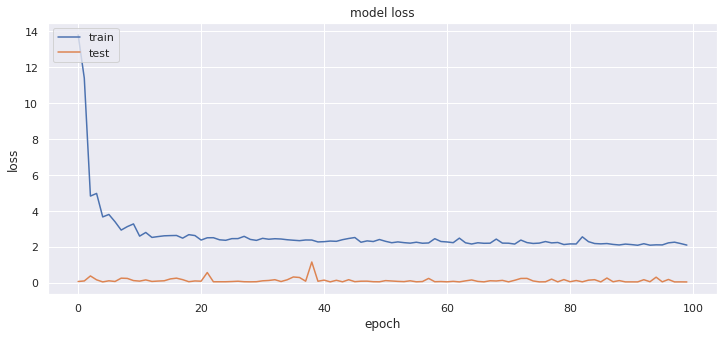

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Saving the Model to google drive

In [ ]:
model_save_name = 'lstm_cnn.h5'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.save(model.state_dict(), path)

In [ ]:
### Make predictions
test = np.asarray(data2[-look_back:].AMM_Ecocash.values.astype('float32')).reshape((1, look_back, 1))
predictions=model_LSTM_CNN.predict(test).astype(int)
#return yhat,model_performance

In [ ]:
predictions = predictions.flatten()
pred_df=pd.DataFrame({'Date': pd.date_range('2021-01-01', periods=120, freq='1D'),
                     'AMM_Ecocash': predictions})
pred_df['Date'] = pred_df['Date'].dt.date
pred_df

,Date,AMM_Ecocash
0,2021-01-01,6
1,2021-01-02,6
2,2021-01-03,6
3,2021-01-04,6
4,2021-01-05,6
...,...,...
115,2021-04-26,6
116,2021-04-27,6
117,2021-04-28,6
118,2021-04-29,6


In [ ]:
pred_df2=pred_df
pred_df2.set_index('Date', inplace=True)
pred_df2.index = pd.to_datetime(pred_df2.index)

In [ ]:
pred_df3 = pred_df[['AMM_Ecocash']].resample("M").sum()
pred_df3.head()

,AMM_Ecocash
Date,
2021-01-31,272653
2021-02-28,239401
2021-03-31,281554
2021-04-30,266620
